# Zoolog

Zoolog, penguen türlerini tanıma konusunda uzmandır. Uzmanımızın adlandırabildiği 3 penguen türü şunlardır:

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/palmer-penguins.png" width=1000>

Peki siz onları ayırt edebiliyor musunuz?


## Görev

Penguenler hakkında hiçbir şey bilmediğimiz için, bu penguenleri özelliklerine göre sınıflandırmak için bir Makine Öğrenimi algoritması kullanalım.

## Dataset’i yükleyin

Seaborn [Penguins dataset](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv)’ini bir DataFrame içine yükleyelim. İşleri kolaylaştırmak için `nans` değerlerinden kurtulun! Aşağıdaki çıktıyı elde etmelisiniz:

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/penguin-df.png' width=600>

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [4]:
df = sns.load_dataset('penguins').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


❓Penguenlerin özellikleri nelerdir?

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png' width=700>

❓Bu veri setinde kaç tür penguen var?

In [10]:
df["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

❓Veri setinde her tür için kaç gözlem var?

In [ ]:
# SENİN KODUN BURAYA

In [14]:
penguin_df = df.copy()

In [15]:
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


##  Veri görselleştirme (Data visualization)

‘bill_length_mm’ değerini ‘bill_depth_mm’ değerine göre, her tür için farklı bir renk kullanarak grafikte gösterin:

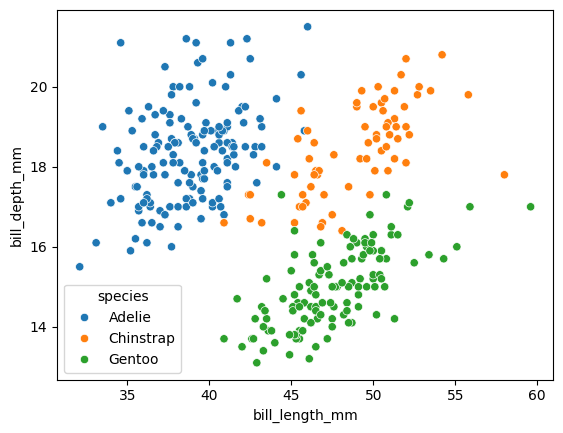

In [17]:
sns.scatterplot(data=penguin_df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

❓Gözlemlerinize dayanarak bu türleri ayırt edebiliyor musunuz?

**gentoo** türü, diğer 2 türe göre açıkça daha uzun yüzgeçlere sahip gibi görünüyor.

## Modelleme

Çoklu sınıf sorununu çözmek için iki strateji vardır:

- Bire bir (One vs One)
- Bire tüm (Bire geri kalan)(One vs All)


### One vs One
- Dataset içindeki **her bir sınıf çifti için bir model** eğitilir
- Tahmin aşamasında, **en fazla oyu alan sınıf** seçilir

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 


👍 Sınıf çiftlerine özgü farkları dikkate alır


👎 Çok sayıda alt model oluşturur: hesaplama açısından maliyetlidir


### One vs Rest (One vs All)

- **Her bir sınıf için**, diğer tüm sınıflara karşı **tek bir model** eğitilir
- Tahmin aşamasında, **en yüksek olasılığa sahip sınıf** seçilir

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍 Hesaplama açısından daha az maliyetlidir


👎 Sınıfların bir araya getirilmesiyle, sınıf çiftlerine özgü farklar kaybolur ve etkileri azalır

## One vs Rest

👇 Penguen türünü **sayısal (numerical)** feature’lara göre tahmin eden bir modeli değerlendirin. scikit-learn içinde, temel model olarak LogisticRegression kullanan bir One vs Rest multi-class classification uygulamak için doğru classifier’ı bulun. Modeli cross-validation ile değerlendirin ve bunun ne kadar süre aldığını kaydedin.

In [19]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

y = df['species']

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
import time

ovr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))

start_time = time.time()

cv_scores = cross_val_score(ovr_model, X, y, cv=5)

end_time = time.time()

print(f"One vs Rest Ortalama Doğruluk: {cv_scores.mean():.4f}")
print(f"Geçen Süre: {end_time - start_time:.4f} saniye")

One vs Rest Ortalama Doğruluk: 0.9880
Geçen Süre: 0.2126 saniye


## One vs One

👇 Bu sefer bir `OneVsOneClassifier` implement edin.

Yine cross-validation ile değerlendirin ve bunun ne kadar süre aldığını kaydedin.

In [21]:
from sklearn.multiclass import OneVsOneClassifier

ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))

start_time = time.time()

cv_scores = cross_val_score(ovo_model, X, y, cv=5)
end_time = time.time()

print(f"One vs One Ortalama Doğruluk: {cv_scores.mean():.4f}")
print(f"Geçen Süre: {end_time - start_time:.4f} saniye")

One vs One Ortalama Doğruluk: 0.9851
Geçen Süre: 0.1598 saniye


ℹ️ Her iki modelin de çok benzer doğruluklara sahip olduğunu görüyoruz. Neden? <br><br>
Öncelikle, her iki model de sınıflandırması görece kolay olan bir dataset üzerinde oldukça iyi bir performans sergiliyor. İkinci olarak, ayırt edilmesi gereken yalnızca üç sınıf olduğunda, hem OvO hem de OvR yaklaşımları aslında **3 adet alt modelin** eğitilmesiyle sonuçlanır! Bu nedenle, çok benzer doğruluklar elde etmemiz beklenir.

❓ Zoolog, 10 denemenin 9’unda doğru türü bulabiliyor; siz onu geçebilir misiniz?

<details>
<summary> 👉Çözüm </summary>
Yaklaşık %98’lik bir ortalama doğruluk elde etmelisiniz; bu da %90’dan daha yüksektir. Yani algoritmamız zoologu geçiyor!

</details>

# 🏁 